# Results From Conway Game of Life Simulations using CUDA


By: Tanmay Grandhisiri

## Directions for your instructor

Include detailed instructions for compiling and reproducing the results you have in this report.  Automate as much of the steps as possible to help speed up grading.


A good idea is to show your specific commands here in the jupyter notebook.  Use the exclamation point (!) to run bash commands inside of jupyter. For example:

Change the cc to gcc in makefile if you want to test part 1, change cc to nvcc for parts 2 and execute the commands:
1. make
2. make clean
3. make test

## Serial Experiment

I compiled the serial code on dev-amd20-v100 using the following commands:

```
make

make clean

make test
```

The command below is used for part 1 testing: 100 is replaced with 5,10,15,20,25.
```
time echo "0 100" | ./gol

In ran the code on `dev-amd20-v100` and obtained the following results. The plot below shows the time taken to run the simulation for different iterations with and without the compiler optimization flag `-O3`. 

```
iterations = [5,10,15,20,25]
times = np.array([62.92,91.569,121.26,141.977,172.66])
times_optimized = np.array([30.252,31.667,33.966,35.949,38.586])
```

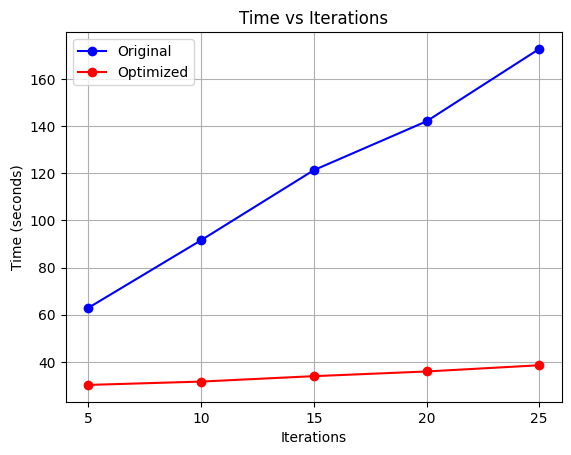

Just using the compiler flags gives a significant speedup

## CUDA Speedup

In this implementation, I allocate two boards in GPU memory, each sized (n+2) \times (n+2), and arrange the threads in 16×16 blocks such that each thread corresponds to one cell. During each iteration, the kernel reads the current board, counts neighbors, applies the Game of Life rules, and writes the updated state to the alternate board. A simple toggle (gpu_which ^= 1) switches between boards each step. If GPU memory allocation fails, I fall back on a CPU-based approach that uses the same logic but runs in serial. At the end, I copy the final board back from the GPU to the CPU, write it out as a PNG, and optionally print the board for verification.


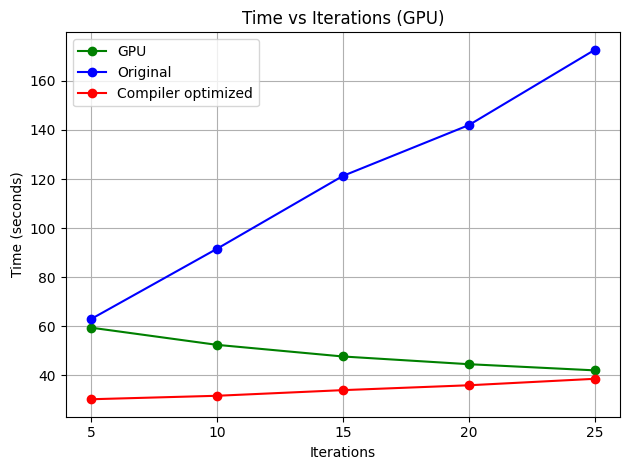


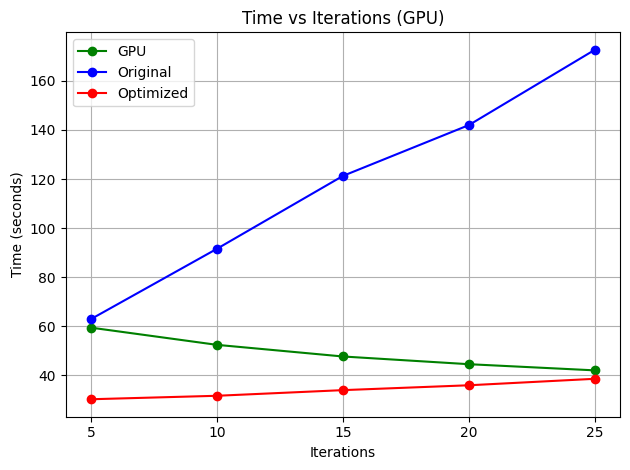

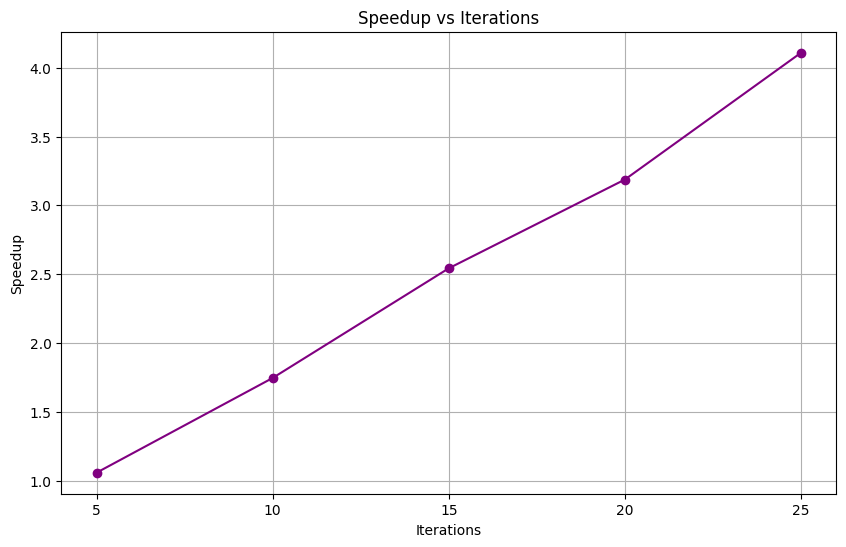

In the chart, the GPU version consistently outperforms the original CPU code, because of the parallel processing of the entire grid. Although there’s some overhead for transferring data to and from the GPU, this overhead becomes less significant as the number of iterations grows, allowing the GPU’s parallelism to shine. The compiler-optimized CPU code improves on the original CPU performance but still doesn’t match the throughput of the GPU for higher iteration counts. If we extended the simulation further, the GPU would show even larger relative speedups, since the one-time overhead would be spread across more work.

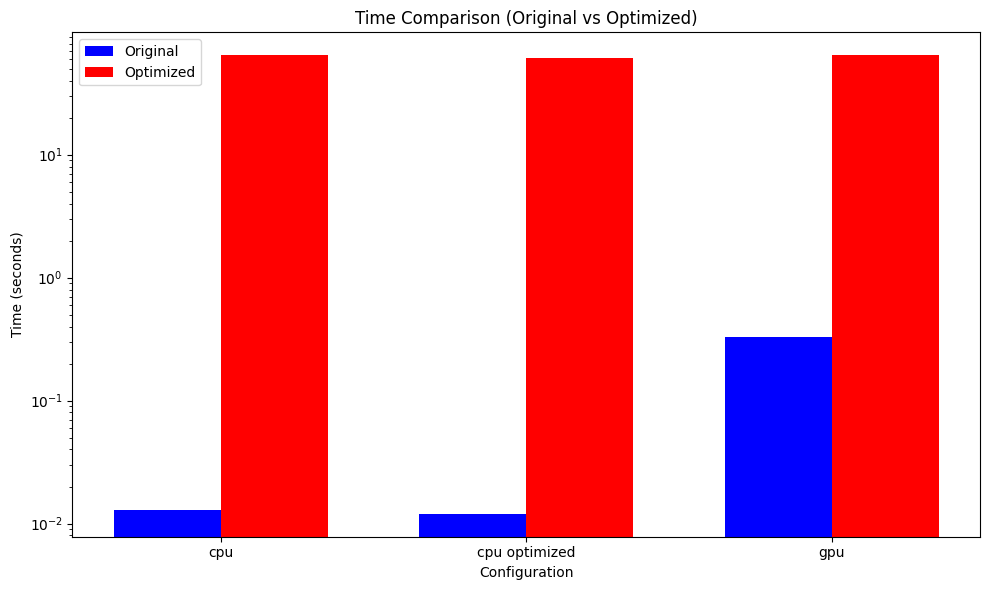

The side-by-side bar chart compares the execution times of `cpu`, `cpu optimized`, and `gpu` configurations for both original and optimized implementations. The original implementation shows significantly faster performance for CPU-based configurations, with times as low as 0.012 seconds, while the `gpu` configuration takes 0.331 seconds. In contrast, the optimized implementation exhibits much higher execution times across all configurations, ranging from 61.624 to 64.275 seconds. This suggests that the optimization efforts may have introduced inefficiencies or additional overhead, particularly for the `gpu` configuration, which isn't what I expected.

# Images

Following are the images from both serial and parallel implementations of the Game of Life. These images are produced for the data2.txt file. I also was not able to put the random images because they were too large. 


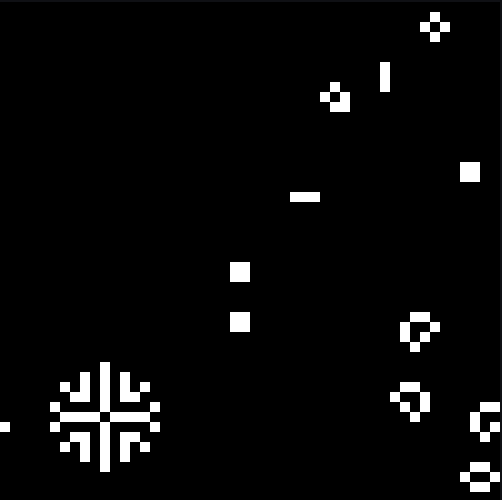

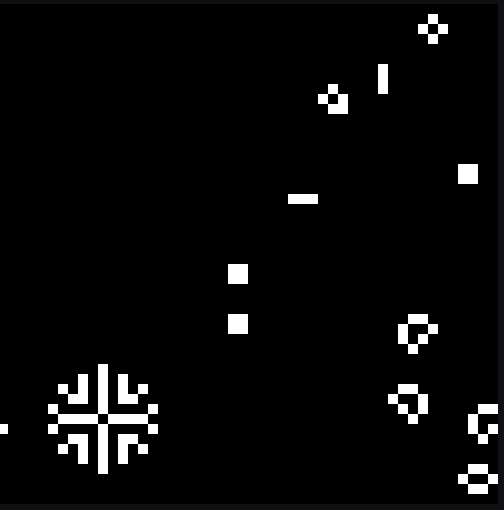

As you can see both the serial and parallel implementations produce the same results.

## Concluding Discussion

I learned a lot, especially about CUDA. CUDA is tough and I faced many challenges while implementing the code. But overall, I had a great time learning about speeding up my code using CUDA. 

----